This is a dataset that reports on the weather and the level of pollution each hour for five years at the US embassy in Beijing, China.

The data includes the date-time, the pollution called PM2.5 concentration, and the weather information including dew point, temperature, pressure, wind direction, wind speed and the cumulative number of hours of snow and rain. The complete feature list in the raw data is as follows:

date:year-month-date of data

pollution: PM2.5 concentration

dew: Dew Point

temp: Temperature

press: Pressure

wnd_dir: Combined wind direction

wnd_spd: Cumulated wind speed

snow: Cumulated hours of snow

rain: Cumulated hours of rain

We can use this data and frame a forecasting problem where, given the weather conditions and pollution for prior hours, we forecast the pollution at the next hour.



# **multivariate(dependence technique)**

In [ ]:
# Load Pakages Mathematical and DATA Operations
import numpy as np
import pandas as pd

# Load Pakages plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load Pakages for Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Load Pakages Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Load Pakages for Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Load Pakages for Evaluation
from sklearn.metrics import mean_squared_error

In [ ]:
# Load Dataset
df=pd.read_csv('/content/LSTM-Multivariate_pollution.csv',parse_dates=['date'])#by using parse_dates convert the string dtype to date format

FileNotFoundError: ignored

In [ ]:
test=pd.read_csv('/content/pollution_test_data1.csv')

Exploratory Data Analysis

In [ ]:
# Displaying the First 5-Records of data
df.head(5)

In [ ]:
#information about rows and columns
print(f' No. of Rows in train: {df.shape[0]} \n No. of Columns in train: {df.shape[1]}')

In [ ]:
print(f' No. of Rows in test: {test.shape[0]} \n No. of Columns in test: {test.shape[1]}')

In [ ]:
# Information of Data
df.info()

In [ ]:
#set date as index
df.index=df['date']

In [ ]:
#drop the date column
df.drop('date',axis=1,inplace=True)

In [ ]:
df.head()

Encoding

In [ ]:
#encoding to convert categorical to numeric
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['wnd_dir']=enc.fit_transform(df['wnd_dir'])

In [ ]:
df.head()

In [ ]:
df.nunique()

Visualization

In [ ]:
#visualize all the features
fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(14,8))
for i,ax in enumerate(axes.flatten()):
  data=df[df.columns[i]]
  ax.plot(data,color='red',linewidth=1)
  ax.set_title(df.columns[i])
  ax.tick_params(labelsize=10)

plt.tight_layout();

In [ ]:
#visualize the pollution feature
plt.figure(figsize=(12,6))
df['pollution'].plot();

Preprocessing

In [ ]:
#create dependent and independent variable with timestep
def df_to_X_y(df,window_size):
  df_as_np=df.to_numpy()
  X=[]
  y=[]
  for i in range(len(df_as_np)-window_size):
    row=[a for a in df_as_np[i:i+window_size]]# add  first 24,2nd 24.....
    X.append(row)
    label=df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X),np.array(y)

In [ ]:
#passing the data and split
X,y=df_to_X_y(df,window_size=24)

In [ ]:
#check the shape
X.shape,y.shape

In [ ]:
#split the data into training data,validation data,test data
x_train,y_train=X[:36915],y[:36915]
x_val,y_val=X[36915:43430],y[36915:43430]
x_test,y_test=X[43430:],y[43430:]
x_train.shape,y_train.shape,x_val.shape,y_val.shape,x_test.shape,y_test.shape

In [ ]:
x_train.shape #input to be 3-dimensional :- (no.of samples, no.of timesteps, no.of features)

In [ ]:
y_train.shape #output to be 2-dimensional :-(no.of samples,no.of features)

Scaling

In [ ]:
df_mean0=np.mean(x_train[:,:,0])#(35020,24,which variable we want use-->1st use 0 index,like for all)
df_std0=np.std(x_train[:,:,0])
df_mean1=np.mean(x_train[:,:,1])
df_std1=np.std(x_train[:,:,1])
df_mean2=np.mean(x_train[:,:,2])
df_std2=np.std(x_train[:,:,2])
df_mean3=np.mean(x_train[:,:,3])
df_std3=np.std(x_train[:,:,3])
df_mean4=np.mean(x_train[:,:,4])
df_std4=np.std(x_train[:,:,4])
df_mean5=np.mean(x_train[:,:,5])
df_std5=np.std(x_train[:,:,5])
df_mean6=np.mean(x_train[:,:,6])
df_std6=np.std(x_train[:,:,6])
df_mean7=np.mean(x_train[:,:,7])
df_std7=np.std(x_train[:,:,7])

In [ ]:
df_mean0,df_mean1

In [ ]:
df_std0,df_std1

In [ ]:
#scaling x data by create def function
def preprocessing(x):
  x[:,:,0]=(x[:,:,0]-df_mean0)/df_std0
  x[:,:,1]=(x[:,:,1]-df_mean1)/df_std1
  x[:,:,2]=(x[:,:,2]-df_mean2)/df_std2
  x[:,:,3]=(x[:,:,3]-df_mean3)/df_std3
  x[:,:,4]=(x[:,:,4]-df_mean4)/df_std4
  x[:,:,5]=(x[:,:,5]-df_mean5)/df_std5
  x[:,:,6]=(x[:,:,6]-df_mean6)/df_std6
  x[:,:,7]=(x[:,:,7]-df_mean7)/df_std7
  return x

In [ ]:
preprocessing(x_train)
preprocessing(x_val)
preprocessing(x_test)

In [ ]:
#import libraries for model building
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.losses import MeanSquaredError as mse
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

Model Building

In [ ]:
#model building
model=Sequential()
model.add(InputLayer((24,8)))
model.add(LSTM(200,activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(150,activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100,activation='relu',return_sequences=False))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1))

In [ ]:
#summary of a model we build
model.summary()

In [ ]:
#to stop epochs if there is no update
earlystop=EarlyStopping(patience=)

In [ ]:
#checkpoint to save the best model
cp=ModelCheckpoint('model/',save_best_only=True)

In [ ]:
#compile the model
model.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics=[RootMeanSquaredError()])

In [ ]:
#fit the model
history=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=25,batch_size=100,callbacks=[cp,earlystop])

Epoch 1/25
370/370 [==============================] - ETA: 0s - loss: 307297.0938 - root_mean_squared_error: 554.3438

370/370 [==============================] - 104s 273ms/step - loss: 307297.0938 - root_mean_squared_error: 554.3438 - val_loss: 3758.5286 - val_root_mean_squared_error: 61.3068
Epoch 2/25
370/370 [==============================] - ETA: 0s - loss: 3651.8203 - root_mean_squared_error: 60.4303

370/370 [==============================] - 75s 202ms/step - loss: 3651.8203 - root_mean_squared_error: 60.4303 - val_loss: 1565.2135 - val_root_mean_squared_error: 39.5628
Epoch 3/25
370/370 [==============================] - ETA: 0s - loss: 2260.0461 - root_mean_squared_error: 47.5399

370/370 [==============================] - 73s 197ms/step - loss: 2260.0461 - root_mean_squared_error: 47.5399 - val_loss: 1077.8486 - val_root_mean_squared_error: 32.8306
Epoch 4/25
370/370 [==============================] - 72s 195ms/step - loss: 1928.0741 - root_mean_squared_error: 43.9098 - val_loss: 1149.8251 - val_root_mean_squared_error: 33.9091
Epoch 5/25
370/370 [==============================] - ETA: 0s - loss: 1711.9736 - root_mean_squared_error: 41.3760

370/370 [==============================] - 74s 200ms/step - loss: 1711.9736 - root_mean_squared_error: 41.3760 - val_loss: 1030.6625 - val_root_mean_squared_error: 32.1039
Epoch 6/25
370/370 [==============================] - ETA: 0s - loss: 1538.4237 - root_mean_squared_error: 39.2227

370/370 [==============================] - 72s 195ms/step - loss: 1538.4237 - root_mean_squared_error: 39.2227 - val_loss: 943.5293 - val_root_mean_squared_error: 30.7169
Epoch 7/25
370/370 [==============================] - ETA: 0s - loss: 1444.3459 - root_mean_squared_error: 38.0046

370/370 [==============================] - 74s 199ms/step - loss: 1444.3459 - root_mean_squared_error: 38.0046 - val_loss: 735.3754 - val_root_mean_squared_error: 27.1178
Epoch 8/25
370/370 [==============================] - ETA: 0s - loss: 1306.1260 - root_mean_squared_error: 36.1404

370/370 [==============================] - 72s 196ms/step - loss: 1306.1260 - root_mean_squared_error: 36.1404 - val_loss: 658.7231 - val_root_mean_squared_error: 25.6656
Epoch 9/25
370/370 [==============================] - 72s 193ms/step - loss: 1248.0682 - root_mean_squared_error: 35.3280 - val_loss: 681.7174 - val_root_mean_squared_error: 26.1097
Epoch 10/25
370/370 [==============================] - 69s 188ms/step - loss: 1171.9591 - root_mean_squared_error: 34.2339 - val_loss: 667.7674 - val_root_mean_squared_error: 25.8412
Epoch 11/25
370/370 [==============================] - ETA: 0s - loss: 1128.0389 - root_mean_squared_error: 33.5863

370/370 [==============================] - 76s 205ms/step - loss: 1128.0389 - root_mean_squared_error: 33.5863 - val_loss: 601.5296 - val_root_mean_squared_error: 24.5261
Epoch 12/25
370/370 [==============================] - 68s 185ms/step - loss: 1072.3307 - root_mean_squared_error: 32.7465 - val_loss: 685.9445 - val_root_mean_squared_error: 26.1905
Epoch 13/25
370/370 [==============================] - 68s 184ms/step - loss: 1045.3611 - root_mean_squared_error: 32.3320 - val_loss: 763.0597 - val_root_mean_squared_error: 27.6235
Epoch 14/25
370/370 [==============================] - ETA: 0s - loss: 1002.2171 - root_mean_squared_error: 31.6578

370/370 [==============================] - 74s 199ms/step - loss: 1002.2171 - root_mean_squared_error: 31.6578 - val_loss: 591.0162 - val_root_mean_squared_error: 24.3108
Epoch 15/25
370/370 [==============================] - 70s 189ms/step - loss: 951.5729 - root_mean_squared_error: 30.8476 - val_loss: 740.6960 - val_root_mean_squared_error: 27.2157
Epoch 16/25
370/370 [==============================] - 70s 188ms/step - loss: 952.8767 - root_mean_squared_error: 30.8687 - val_loss: 710.5443 - val_root_mean_squared_error: 26.6560
Epoch 17/25
370/370 [==============================] - 69s 187ms/step - loss: 901.2610 - root_mean_squared_error: 30.0210 - val_loss: 600.9878 - val_root_mean_squared_error: 24.5151


In [ ]:
#load the best save model for prediction
model=load_model('model/')

Evaluation

In [ ]:
#evaluate the validation set
val_pred=model.predict(x_val).flatten()

204/204 [==============================] - 6s 30ms/step


In [ ]:
#create  dataframe for evaluation of validation set
val_results=pd.DataFrame(data={'actual':y_val,'prediction':val_pred})
val_results

,actual,prediction
0,12.0,11.820224
1,13.0,11.385664
2,17.0,11.417625
3,16.0,12.383921
4,26.0,14.263378
...,...,...
6510,88.0,64.052513
6511,96.0,79.531853
6512,121.0,79.750229
6513,152.0,88.076263


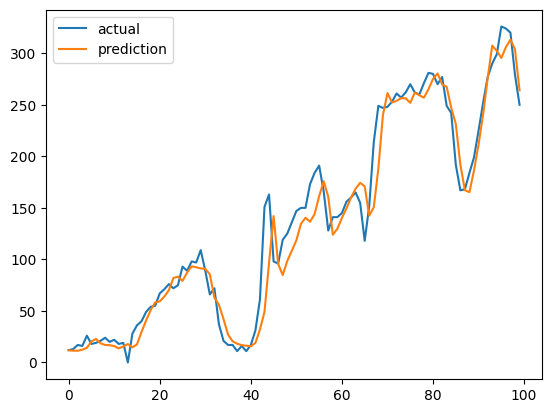

In [ ]:
#plot the validation result
plt.plot(val_results['actual'][:100])
plt.plot(val_results['prediction'][:100])
plt.legend(['actual','prediction']);

Evaluation on test set

In [ ]:
#def function for prediction and plotting
def plot_prediction(model,X,y,start,end):
  pred=model.predict(X)
  pred_poll=model.predict(X).flatten()
  act_poll=y
  results=pd.DataFrame(data={'actual':act_poll,'prediction':pred_poll})
  return results

In [ ]:
#forecast prediction
post_processed_df=plot_prediction(model,x_test,y_test,0,346)
post_processed_df

11/11 [==============================] - 0s 28ms/step


,actual,prediction
0,128.0,145.495422
1,77.0,127.021629
2,65.0,82.642303
3,79.0,73.702209
4,93.0,81.357582
...,...,...
341,8.0,9.132942
342,10.0,9.066378
343,10.0,9.106226
344,8.0,9.337923


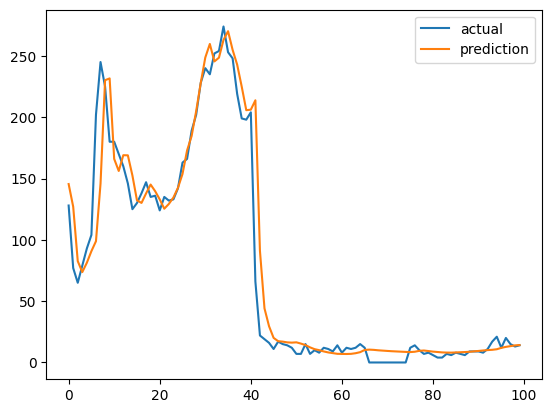

In [ ]:
#plot for first 100 records in test
plt.plot(post_processed_df['actual'][:100])
plt.plot(post_processed_df['prediction'][:100])
plt.legend(['actual','prediction']);

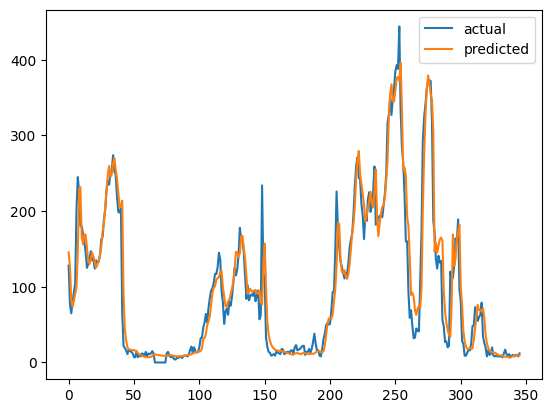

In [ ]:
#plot all records on test data
plt.plot(post_processed_df['actual'])
plt.plot(post_processed_df['prediction'])
plt.legend(['actual','predicted']);

In [ ]:
#save the forecasted values
post_processed_df['prediction'].to_csv('forecasted_values')

In [ ]:
#predicting whole dataset
whole_data=plot_prediction(model,X,y,0,43776)
whole_data

1368/1368 [==============================] - 38s 28ms/step


,actual,prediction
0,90.0,134.503113
1,63.0,103.358475
2,65.0,80.766800
3,55.0,74.364273
4,65.0,69.348145
...,...,...
43771,8.0,9.132942
43772,10.0,9.066378
43773,10.0,9.106226
43774,8.0,9.337923


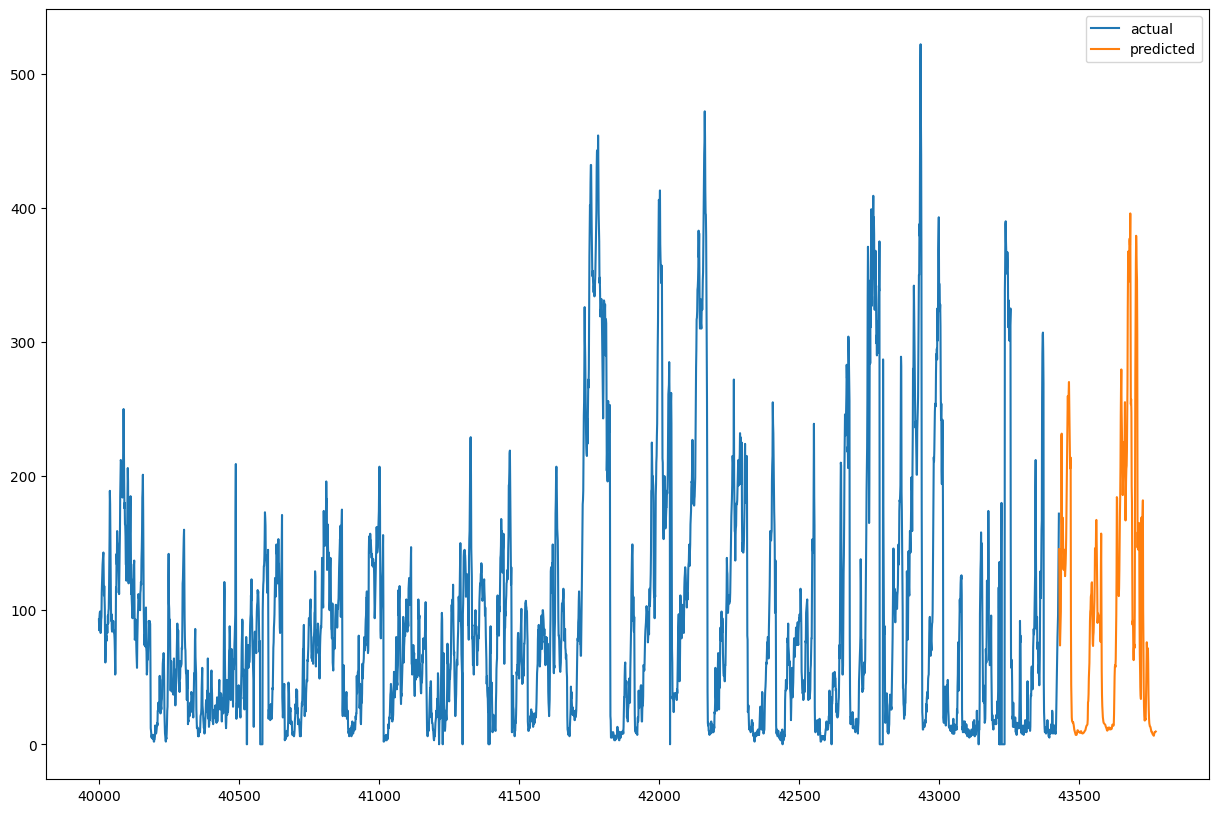

In [ ]:
#plotting actual vs forecasting values
plt.figure(figsize=(15,10))
plt.plot(whole_data['actual'][40000:43430])
plt.plot(whole_data['prediction'][43430:])
plt.legend(['actual','predicted']);

# **multivariate-parallel series(interdependence technique)**

In [ ]:
# Load Pakages Mathematical and DATA Operations
import numpy as np
import pandas as pd

# Load Pakages plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load Pakages for Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Load Pakages Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Load Pakages for Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Load Pakages for Evaluation
from sklearn.metrics import mean_squared_error

In [ ]:
# Load Dataset
df=pd.read_csv('/content/LSTM-Multivariate_pollution.csv',parse_dates=['date'])#by using parse_dates convert the string dtype to date format

eda

In [ ]:
# Displaying the First 5-Records of data
df.head(5)

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [ ]:
# Displaying the Last 5-Records of data
df.tail(5)

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
43795,2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43796,2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43797,2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43798,2014-12-31 22:00:00,8.0,-22,-4.0,1034.0,NW,246.72,0,0
43799,2014-12-31 23:00:00,12.0,-21,-3.0,1034.0,NW,249.85,0,0


In [ ]:
#information about rows and columns
print(f' No. of Rows: {df.shape[0]} \n No. of Columns: {df.shape[1]}')

 No. of Rows: 43800 
 No. of Columns: 9


In [ ]:
# Information of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       43800 non-null  datetime64[ns]
 1   pollution  43800 non-null  float64       
 2   dew        43800 non-null  int64         
 3   temp       43800 non-null  float64       
 4   press      43800 non-null  float64       
 5   wnd_dir    43800 non-null  object        
 6   wnd_spd    43800 non-null  float64       
 7   snow       43800 non-null  int64         
 8   rain       43800 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 3.0+ MB


In [ ]:
#set date as index
df.index=df['date']

In [ ]:
#drop the date column
df.drop('date',axis=1,inplace=True)

In [ ]:
df.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


encoding

In [ ]:
#encoding to convert categorical to numeric
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['wnd_dir']=enc.fit_transform(df['wnd_dir'])

In [ ]:
df.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,2,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,2,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,2,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,2,6.25,2,0


visualization

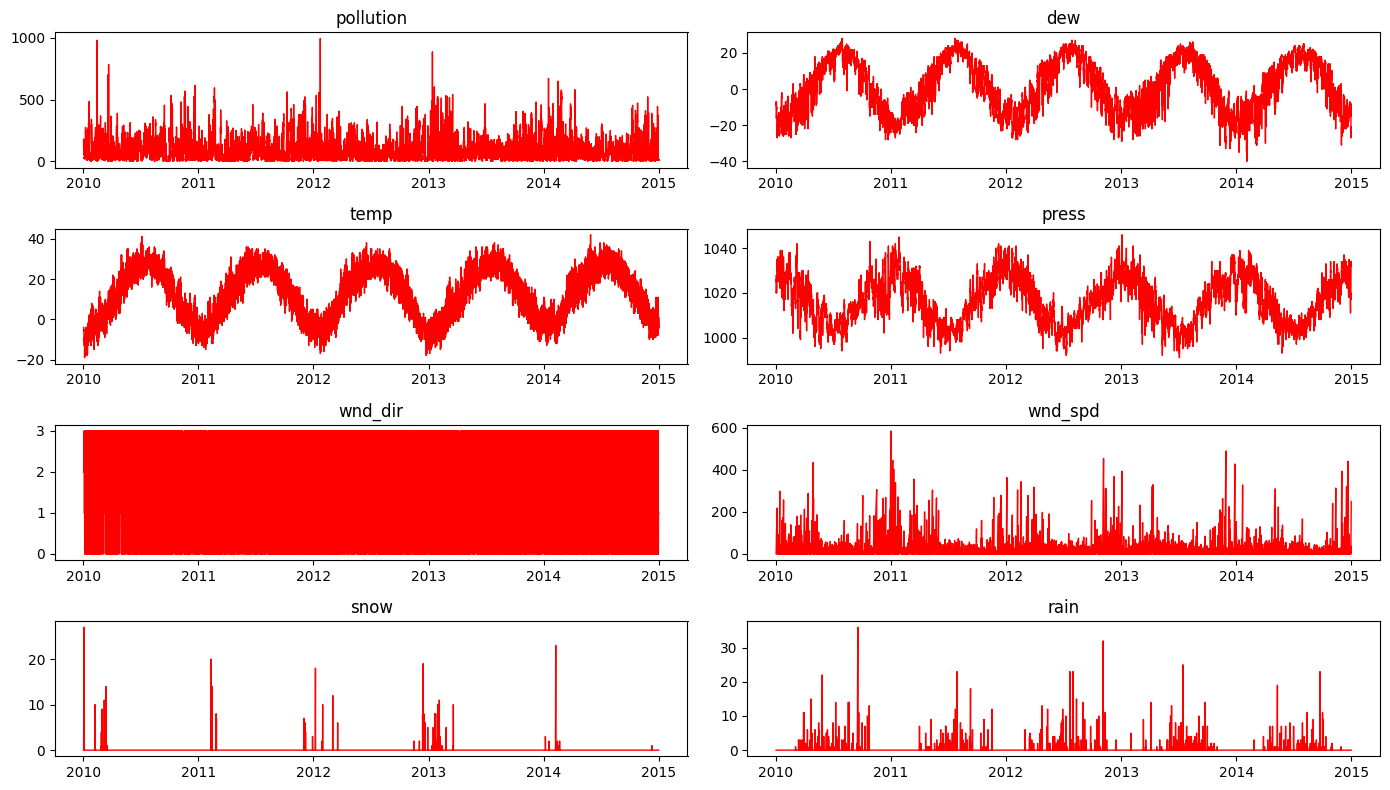

In [ ]:
#visualize all features
fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(14,8))
for i,ax in enumerate(axes.flatten()):
  data=df[df.columns[i]]
  ax.plot(data,color='red',linewidth=1)
  ax.set_title(df.columns[i])
  ax.tick_params(labelsize=10)

plt.tight_layout();

preprocessing

In [ ]:
#create dependent and independent variable with timestep
def df_to_X_y(df,window_size):
  df_as_np=df.to_numpy()
  X=[]
  y=[]
  for i in range(len(df_as_np)-window_size):
    row=[a for a in df_as_np[i:i+window_size]]# add  first 24,2nd 24.....
    X.append(row)
    label=df_as_np[i+window_size]
    y.append(label)
  return np.array(X),np.array(y)

In [ ]:
#passing the data and split
X,y=df_to_X_y(df,window_size=24)

In [ ]:
#check the shape
X.shape,y.shape

((43776, 24, 8), (43776, 8))

In [ ]:
#split the data into training data,validation data,test data
x_train,y_train=X[:36915],y[:36915]
x_val,y_val=X[36915:43430],y[36915:43430]
x_test,y_test=X[43430:],y[43430:]
x_train.shape,y_train.shape,x_val.shape,y_val.shape,x_test.shape,y_test.shape

((36915, 24, 8), (36915, 8), (6515, 24, 8), (6515, 8), (346, 24, 8), (346, 8))

In [ ]:
x_train.shape #input to be 3-dimensional :- (no.of samples, no.of timesteps, no.of features)

(36915, 24, 8)

In [ ]:
y_train.shape #output to be 2-dimensional :-(no.of samples,no.of features)

(36915, 8)

scaling

In [ ]:
df_mean0=np.mean(x_train[:,:,0])#(32832all,24all,which variable we want use-->1st use 0 index,for all :)
df_std0=np.std(x_train[:,:,0])
df_mean1=np.mean(x_train[:,:,1])
df_std1=np.std(x_train[:,:,1])
df_mean2=np.mean(x_train[:,:,2])
df_std2=np.std(x_train[:,:,2])
df_mean3=np.mean(x_train[:,:,3])
df_std3=np.std(x_train[:,:,3])
df_mean4=np.mean(x_train[:,:,4])
df_std4=np.std(x_train[:,:,4])
df_mean5=np.mean(x_train[:,:,5])
df_std5=np.std(x_train[:,:,5])
df_mean6=np.mean(x_train[:,:,6])
df_std6=np.std(x_train[:,:,6])
df_mean7=np.mean(x_train[:,:,7])
df_std7=np.std(x_train[:,:,7])

In [ ]:
df_mean0,df_mean1

(95.23928168314596, 0.9785780396406158)

In [ ]:
df_std0,df_std1

(94.10206437057147, 14.636110028742598)

In [ ]:
#scaling x data by create def function
def preprocessing(x):
  x[:,:,0]=(x[:,:,0]-df_mean0)/df_std0
  x[:,:,1]=(x[:,:,1]-df_mean1)/df_std1
  x[:,:,2]=(x[:,:,2]-df_mean2)/df_std2
  x[:,:,3]=(x[:,:,3]-df_mean3)/df_std3
  x[:,:,4]=(x[:,:,4]-df_mean4)/df_std4
  x[:,:,5]=(x[:,:,5]-df_mean5)/df_std5
  x[:,:,6]=(x[:,:,6]-df_mean6)/df_std6
  x[:,:,7]=(x[:,:,7]-df_mean7)/df_std7
  return x

In [ ]:
preprocessing(x_train)
preprocessing(x_val)
preprocessing(x_test)

array([[[-0.76766947, -1.43334383, -0.94168273, ...,  4.87040835,
         -0.07533147, -0.13729079],
        [-0.87393706, -1.501668  , -1.02294268, ...,  5.04690753,
         -0.07533147, -0.13729079],
        [-0.92707086, -1.43334383, -1.02294268, ...,  5.16161225,
         -0.07533147, -0.13729079],
        ...,
        [ 0.27375296, -1.16004717, -1.02294268, ..., -0.4156827 ,
         -0.07533147, -0.13729079],
        [ 0.6031825 , -1.22837134, -0.94168273, ..., -0.4687904 ,
         -0.07533147, -0.13729079],
        [ 0.81571769, -1.22837134, -0.77916285, ..., -0.45102202,
         -0.07533147, -0.13729079]],

       [[-0.87393706, -1.501668  , -1.02294268, ...,  5.04690753,
         -0.07533147, -0.13729079],
        [-0.92707086, -1.43334383, -1.02294268, ...,  5.16161225,
         -0.07533147, -0.13729079],
        [-0.90581734, -1.43334383, -1.18546256, ...,  5.24097765,
         -0.07533147, -0.13729079],
        ...,
        [ 0.6031825 , -1.22837134, -0.94168273, ..., -

In [ ]:
#scaling y data by create def function
def preprocessing(y):
  y[:,0]=(y[:,0]-df_mean0)/df_std0
  y[:,1]=(y[:,1]-df_mean1)/df_std1
  y[:,2]=(y[:,2]-df_mean2)/df_std2
  y[:,3]=(y[:,3]-df_mean3)/df_std3
  y[:,4]=(y[:,4]-df_mean4)/df_std4
  y[:,5]=(y[:,5]-df_mean5)/df_std5
  y[:,6]=(y[:,6]-df_mean6)/df_std6
  y[:,7]=(y[:,7]-df_mean7)/df_std7
  return y

In [ ]:
preprocessing(y_train)
preprocessing(y_val)
preprocessing(y_test)

array([[ 0.34814027, -1.16004717, -0.61664296, ..., -0.4156827 ,
        -0.07533147, -0.13729079],
       [-0.19382446, -1.22837134, -0.53538302, ..., -0.3363173 ,
        -0.07533147, -0.13729079],
       [-0.32134557, -1.16004717, -0.61664296, ..., -0.30097798,
        -0.07533147, -0.13729079],
       ...,
       [-0.90581734, -1.56999216, -1.18546256, ...,  4.30517665,
        -0.07533147, -0.13729079],
       [-0.92707086, -1.56999216, -1.2667225 , ...,  4.38454205,
        -0.07533147, -0.13729079],
       [-0.88456382, -1.501668  , -1.18546256, ...,  4.44633651,
        -0.07533147, -0.13729079]])

In [ ]:
#import libraries for model building
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.losses import MeanSquaredError as mse
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

model building

In [ ]:
#model building
model=Sequential()
model.add(InputLayer((24,8)))
model.add(LSTM(150,activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(150,activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(150,activation='relu',return_sequences=False))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(8))

In [ ]:
#summary of a model we build
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 24, 150)           95400     
                                                                 
 dropout_6 (Dropout)         (None, 24, 150)           0         
                                                                 
 lstm_10 (LSTM)              (None, 24, 150)           180600    
                                                                 
 dropout_7 (Dropout)         (None, 24, 150)           0         
                                                                 
 lstm_11 (LSTM)              (None, 150)               180600    
                                                                 
 dense_10 (Dense)            (None, 100)               15100     
                                                                 
 dense_11 (Dense)            (None, 100)              

In [ ]:
#to stop epochs if there is no update
earlystop=EarlyStopping(patience=5)

In [ ]:
#checkpoint to save the best model
cp=ModelCheckpoint('model/',save_best_only=True)

In [ ]:
#compile the model
model.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics=[RootMeanSquaredError()])

In [ ]:
#fit the model
history=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=25,batch_size=101,callbacks=[cp,earlystop])

Epoch 1/25
366/366 [==============================] - ETA: 0s - loss: 0.4575 - root_mean_squared_error: 0.6764

366/366 [==============================] - 81s 212ms/step - loss: 0.4575 - root_mean_squared_error: 0.6764 - val_loss: 0.2256 - val_root_mean_squared_error: 0.4750
Epoch 2/25
366/366 [==============================] - ETA: 0s - loss: 0.2823 - root_mean_squared_error: 0.5313

366/366 [==============================] - 72s 196ms/step - loss: 0.2823 - root_mean_squared_error: 0.5313 - val_loss: 0.1760 - val_root_mean_squared_error: 0.4195
Epoch 3/25
366/366 [==============================] - ETA: 0s - loss: 0.2275 - root_mean_squared_error: 0.4769

366/366 [==============================] - 71s 195ms/step - loss: 0.2275 - root_mean_squared_error: 0.4769 - val_loss: 0.1597 - val_root_mean_squared_error: 0.3996
Epoch 4/25
366/366 [==============================] - ETA: 0s - loss: 0.2144 - root_mean_squared_error: 0.4630

366/366 [==============================] - 73s 199ms/step - loss: 0.2144 - root_mean_squared_error: 0.4630 - val_loss: 0.1565 - val_root_mean_squared_error: 0.3956
Epoch 5/25
366/366 [==============================] - ETA: 0s - loss: 0.1982 - root_mean_squared_error: 0.4452

366/366 [==============================] - 72s 197ms/step - loss: 0.1982 - root_mean_squared_error: 0.4452 - val_loss: 0.1564 - val_root_mean_squared_error: 0.3954
Epoch 6/25
366/366 [==============================] - ETA: 0s - loss: 0.1964 - root_mean_squared_error: 0.4432

366/366 [==============================] - 72s 196ms/step - loss: 0.1964 - root_mean_squared_error: 0.4432 - val_loss: 0.1533 - val_root_mean_squared_error: 0.3915
Epoch 7/25
366/366 [==============================] - 67s 184ms/step - loss: 0.1954 - root_mean_squared_error: 0.4420 - val_loss: 0.1570 - val_root_mean_squared_error: 0.3962
Epoch 8/25
366/366 [==============================] - 66s 182ms/step - loss: 0.2125 - root_mean_squared_error: 0.4610 - val_loss: 0.1633 - val_root_mean_squared_error: 0.4041
Epoch 9/25
366/366 [==============================] - ETA: 0s - loss: 0.1955 - root_mean_squared_error: 0.4422

366/366 [==============================] - 73s 201ms/step - loss: 0.1955 - root_mean_squared_error: 0.4422 - val_loss: 0.1509 - val_root_mean_squared_error: 0.3885
Epoch 10/25
366/366 [==============================] - ETA: 0s - loss: 0.1844 - root_mean_squared_error: 0.4295

366/366 [==============================] - 71s 195ms/step - loss: 0.1844 - root_mean_squared_error: 0.4295 - val_loss: 0.1497 - val_root_mean_squared_error: 0.3870
Epoch 11/25
366/366 [==============================] - ETA: 0s - loss: 0.1824 - root_mean_squared_error: 0.4271

366/366 [==============================] - 73s 200ms/step - loss: 0.1824 - root_mean_squared_error: 0.4271 - val_loss: 0.1448 - val_root_mean_squared_error: 0.3806
Epoch 12/25
366/366 [==============================] - 68s 186ms/step - loss: 0.1805 - root_mean_squared_error: 0.4248 - val_loss: 0.1496 - val_root_mean_squared_error: 0.3868
Epoch 13/25
366/366 [==============================] - 69s 189ms/step - loss: 0.1842 - root_mean_squared_error: 0.4292 - val_loss: 0.1453 - val_root_mean_squared_error: 0.3812
Epoch 14/25
366/366 [==============================] - ETA: 0s - loss: 0.1759 - root_mean_squared_error: 0.4194

366/366 [==============================] - 72s 197ms/step - loss: 0.1759 - root_mean_squared_error: 0.4194 - val_loss: 0.1446 - val_root_mean_squared_error: 0.3803
Epoch 15/25
366/366 [==============================] - 68s 187ms/step - loss: 0.1754 - root_mean_squared_error: 0.4189 - val_loss: 0.1480 - val_root_mean_squared_error: 0.3848
Epoch 16/25
366/366 [==============================] - ETA: 0s - loss: 0.1784 - root_mean_squared_error: 0.4223

366/366 [==============================] - 73s 200ms/step - loss: 0.1784 - root_mean_squared_error: 0.4223 - val_loss: 0.1443 - val_root_mean_squared_error: 0.3798
Epoch 17/25
366/366 [==============================] - 67s 183ms/step - loss: 0.1803 - root_mean_squared_error: 0.4246 - val_loss: 0.1473 - val_root_mean_squared_error: 0.3838
Epoch 18/25
366/366 [==============================] - 67s 182ms/step - loss: 0.1721 - root_mean_squared_error: 0.4148 - val_loss: 0.1455 - val_root_mean_squared_error: 0.3814
Epoch 19/25
366/366 [==============================] - ETA: 0s - loss: 0.1768 - root_mean_squared_error: 0.4205

366/366 [==============================] - 71s 195ms/step - loss: 0.1768 - root_mean_squared_error: 0.4205 - val_loss: 0.1439 - val_root_mean_squared_error: 0.3794
Epoch 20/25
366/366 [==============================] - 69s 188ms/step - loss: 0.1701 - root_mean_squared_error: 0.4125 - val_loss: 0.1440 - val_root_mean_squared_error: 0.3795
Epoch 21/25
366/366 [==============================] - 68s 184ms/step - loss: 0.1691 - root_mean_squared_error: 0.4113 - val_loss: 0.1501 - val_root_mean_squared_error: 0.3874
Epoch 22/25
366/366 [==============================] - 69s 188ms/step - loss: 0.1726 - root_mean_squared_error: 0.4154 - val_loss: 0.1439 - val_root_mean_squared_error: 0.3794
Epoch 23/25
366/366 [==============================] - ETA: 0s - loss: 0.1711 - root_mean_squared_error: 0.4137

366/366 [==============================] - 76s 208ms/step - loss: 0.1711 - root_mean_squared_error: 0.4137 - val_loss: 0.1435 - val_root_mean_squared_error: 0.3788
Epoch 24/25
366/366 [==============================] - 70s 193ms/step - loss: 0.1674 - root_mean_squared_error: 0.4092 - val_loss: 0.1473 - val_root_mean_squared_error: 0.3837
Epoch 25/25
366/366 [==============================] - ETA: 0s - loss: 0.1667 - root_mean_squared_error: 0.4083

366/366 [==============================] - 77s 212ms/step - loss: 0.1667 - root_mean_squared_error: 0.4083 - val_loss: 0.1433 - val_root_mean_squared_error: 0.3786


In [ ]:
#load the best save model for prediction
model=load_model('model/')

evaluation

In [ ]:
#evaluate the validation set
val_pred=model.predict(x_val)
x_val_poll,x_val_temp=val_pred[:,0],val_pred[:,2]
y_val_poll,y_val_temp=y_val[:,0],y_val[:,2]

204/204 [==============================] - 6s 30ms/step


In [ ]:
#create  dataframe for evaluation of validation set
val_results=pd.DataFrame(data={'actual_poll':y_val_poll,'prediction_poll':x_val_poll,'actual_temp':y_val_temp,'prediction_temp':x_val_temp})
val_results

,actual_poll,prediction_poll,actual_temp,prediction_temp
0,-0.884564,-0.916990,-0.129083,0.036365
1,-0.873937,-0.910919,-0.291603,-0.069885
2,-0.831430,-0.887071,-0.616643,-0.193340
3,-0.842057,-0.864195,-0.535383,-0.330706
4,-0.735789,-0.844523,-0.535383,-0.407402
...,...,...,...,...
6510,-0.076930,-0.354995,-1.429242,-1.536861
6511,0.008084,-0.289824,-1.185463,-1.309758
6512,0.273753,-0.402459,-1.022943,-0.979738
6513,0.603182,-0.179923,-0.941683,-0.891002


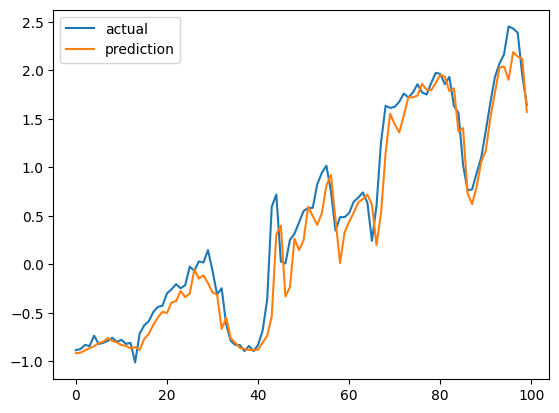

In [ ]:
#visualize the validation result for pollution
plt.plot(val_results['actual_poll'][:100])
plt.plot(val_results['prediction_poll'][:100])
plt.legend(['actual','prediction']);

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
rmse=np.sqrt(mse(x_val_poll,y_val_poll))
rmse

0.2336742958949804

In [ ]:
#By rescaling convert the scaling value to actual value
def postprocessing_p(array):
  array=(array*df_std0)+df_mean0
  return array

Evaluation on test set

In [ ]:
#def function for prediction and plotting
def plot_prediction(model,X,y,start,end):
  pred=model.predict(X)
  pred_poll,pred_temp=postprocessing_p(pred[:,0]),postprocessing_p(pred[:,2])
  act_poll,act_temp=postprocessing_p(y[:,0]),postprocessing_p(y[:,2])
  results=pd.DataFrame(data={'actual_poll':act_poll,'prediction_poll':pred_poll,'actual_temp':act_temp,'prediction_temp':pred_temp})
  return results

In [ ]:
#forecast prediction
processed_df=plot_prediction(model,x_test,y_test,0,346)
processed_df

11/11 [==============================] - 0s 27ms/step


,actual_poll,prediction_poll,actual_temp,prediction_temp
0,128.0,142.813889,37.211906,26.955956
1,77.0,93.001701,44.858634,39.340462
2,65.0,59.405773,37.211906,43.500729
3,79.0,58.375492,14.271721,35.409035
4,93.0,77.245407,6.624993,13.563240
...,...,...,...,...
341,8.0,4.346725,-8.668464,-4.472481
342,10.0,4.044243,-16.315193,-7.287460
343,10.0,4.294342,-16.315193,-12.793236
344,8.0,5.051666,-23.961921,-16.363960


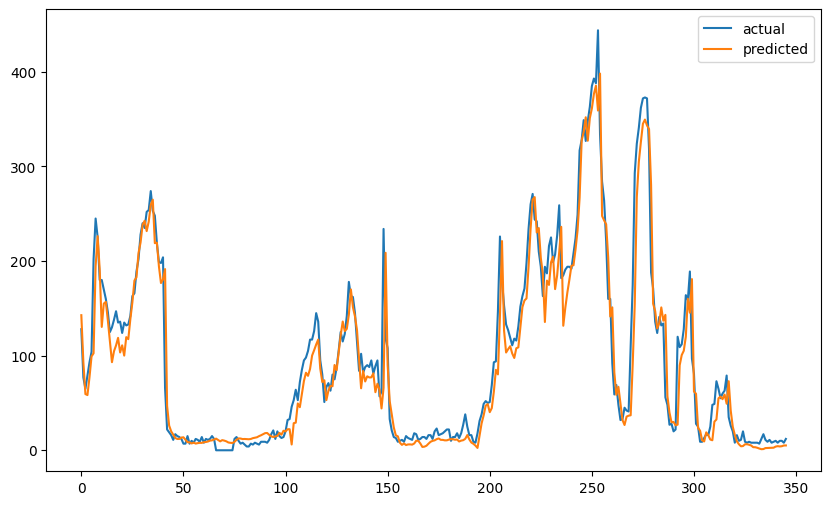

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(processed_df['actual_poll'])
plt.plot(processed_df['prediction_poll'])
plt.legend(['actual','predicted']);

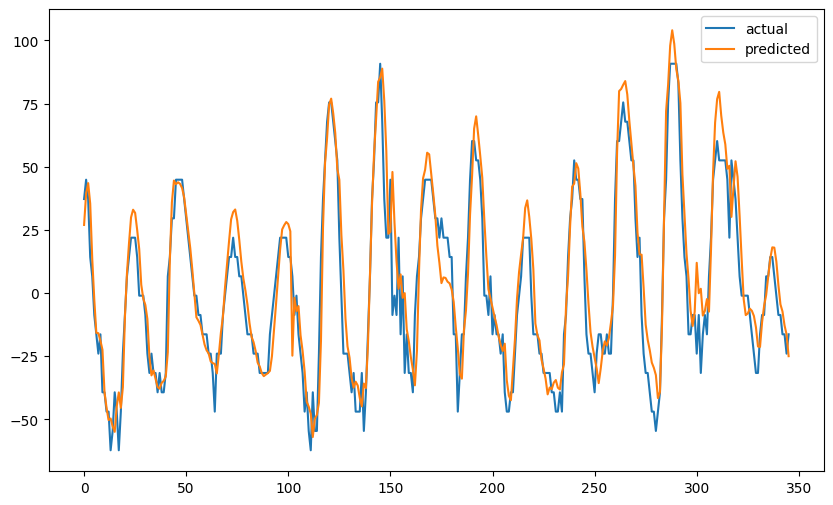

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(processed_df['actual_temp'])
plt.plot(processed_df['prediction_temp'])
plt.legend(['actual','predicted']);

In [ ]:
#save the forecasted values
processed_df.to_csv('forecasted_values')

In [ ]:
def plot_prediction(model,X,y,start,end):
  pred=model.predict(X)
  pred_poll,pred_temp=postprocessing_p(pred[:,0]),postprocessing_p(pred[:,2])
  act_poll,act_temp=postprocessing_p(y[:,0]),postprocessing_p(y[:,2])
  results=pd.DataFrame(data={'actual_poll':act_poll,'prediction_poll':pred_poll,'actual_temp':act_temp,'prediction_temp':pred_temp})
  return results

In [ ]:
#predicting whole dataset
whole_data=plot_prediction(model,X,y,0,43776)

1368/1368 [==============================] - 43s 31ms/step


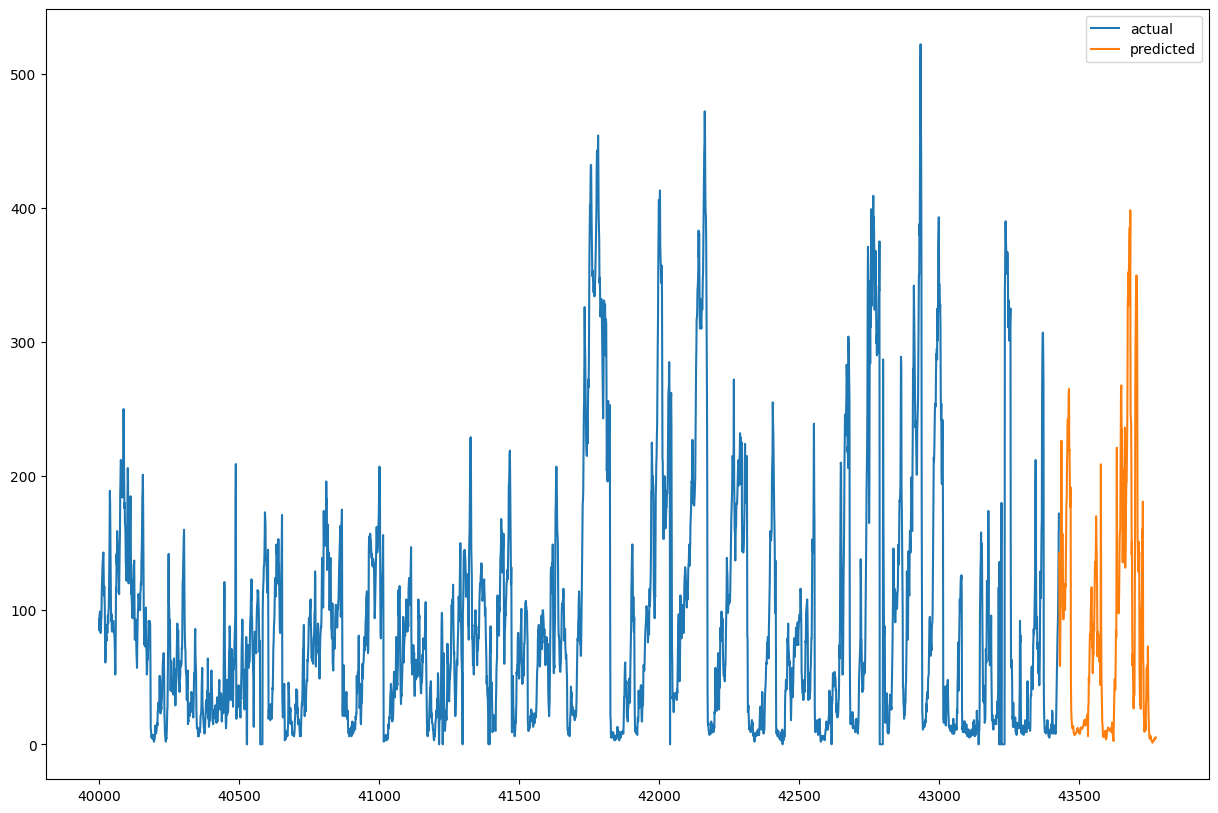

In [ ]:
#plotting actual vs forecasting values
plt.figure(figsize=(15,10))
plt.plot(whole_data['actual_poll'][40000:43430])
plt.plot(whole_data['prediction_poll'][43430:])
plt.legend(['actual','predicted']);